In [86]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [87]:
def load_ith_data(file_path,index,maxepoch,space,dataname):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    for data in fileslist:
        if data.find('Rewards')!=-1 and data[-5]== str(index):
            rewards = np.load(file_path+'/' +data)[0:maxepoch+1]
        elif data.find('success')!=-1 and data[-5]== str(index):
            s_rate = np.load(file_path+'/' +data)[0:maxepoch+1]
        elif data.find('steps')!=-1 and data[-5]== str(index):
            steps = np.load(file_path+'/' +data)[0:maxepoch+1]
    train_epoch = np.arange(0,maxepoch+1,space)
    df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Completion steps':steps,'Train epoch':train_epoch,'repeat':str(index),'schema':dataname})
    return df

In [88]:
def load_vdn_data(file_path,numtimes=5,maxepoch=100,space=5,dataname='VDN'):
    fileslist  = os.listdir(file_path)
    total_data = []
    for i in range(numtimes):
        df = load_ith_data(file_path,i,maxepoch,space,dataname)
        total_data.append(df)
    total_data = pd.concat(total_data,axis=0,ignore_index=True)
    return total_data

In [89]:
def load_ppo_data(file_path,num=5,maxepoch=100,spacing=5,dataname='Baseline'):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    total_data=[]
    for i in range(num):
        for data in fileslist:
            if data.find('rewards')!=-1:
                rewards = np.load(file_path+'/' +data)[i][0:maxepoch//5+1]
            elif data.find('success')!=-1:
                s_rate = np.load(file_path+'/' +data)[i][0:maxepoch//5+1]
            elif data.find('steps')!=-1 :
                steps = np.load(file_path+'/' +data)[i][0:maxepoch//5+1]
        train_epoch = np.arange(0,maxepoch+1,spacing)
        df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Completion steps':steps,'Train epoch':train_epoch,'repeat':str(i),'schema':dataname})
        total_data.append(df)
    total_data = pd.concat(total_data,axis=0,ignore_index=True)
    return total_data

In [90]:
def append_data(start,end,data):
    x = np.arange(start+1,end+1)
    y_su = np.ones(end-start)*[np.sum(data['Success rate'])/len(data)]
    y_step = np.ones(end-start)*[np.sum(data['Completion steps'])/len(data)]
    y_r = np.ones(end-start)*[np.sum(data['Rewards'])/len(data)]
    return x, {'success':y_su,'step':y_step,'reward':y_r}

[(0.12156862745098039, 0.47058823529411764, 0.7058823529411765), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]


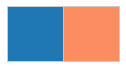

In [91]:
sns.set_theme(context='paper', style='whitegrid', font='Arial', font_scale=1.8)
# color = sns.color_palette('Paired',10)
color=[(0.12156862745098039, 0.47058823529411764, 0.7058823529411765),(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]
sns.palplot(color)
sns.set_palette(color)
print(color)

[(0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254), (0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]


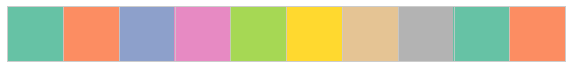

In [92]:
color = sns.color_palette('Set2',10)
sns.palplot(color)
print(color)

In [93]:
vdn2d = load_vdn_data('vdn-2d',maxepoch=100,space=5)
ppo2d = load_ppo_data('ppo-2d',maxepoch=300,spacing=5)

In [94]:
data_2d = pd.concat([vdn2d,ppo2d],axis=0,ignore_index=True)
last  = vdn2d[vdn2d['Train epoch']==100]
x_app,y_app = append_data(100,300,last)

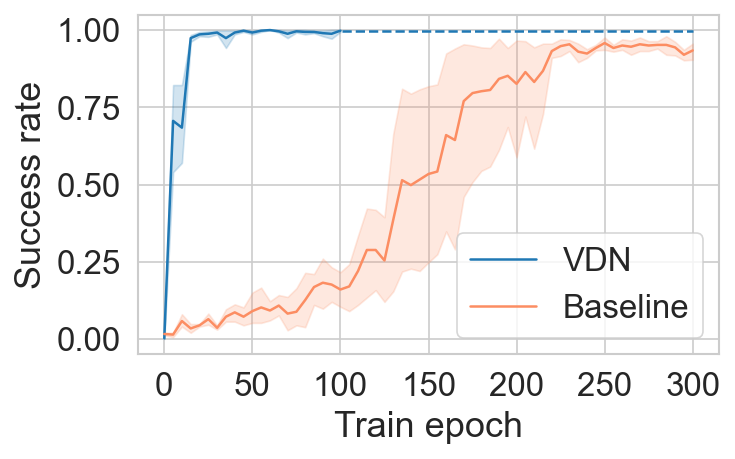

In [95]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Success rate',hue='schema',data=data_2d)
ax1 = plt.plot(x_app,y_app['success'],linestyle = '--',color=(0.12156862745098039, 0.47058823529411764, 0.7058823529411765))
ax = plt.gca()
ax.set_xticks(range(0,301,50))
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

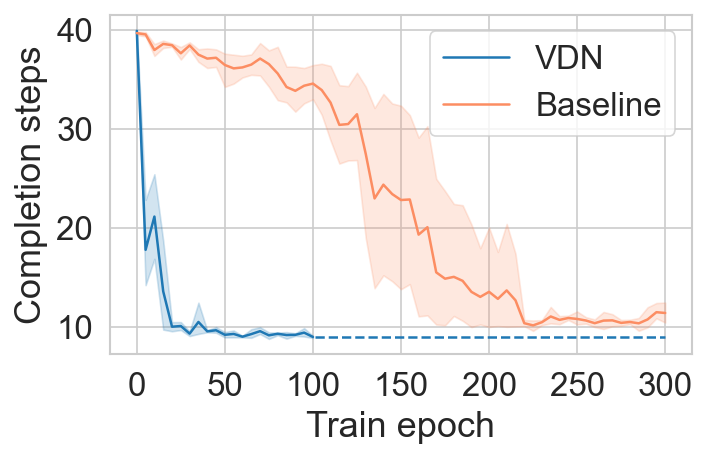

In [97]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Completion steps',hue='schema',data=data_2d)
ax1 = plt.plot(x_app,y_app['step'],linestyle = '--',color=(0.12156862745098039, 0.47058823529411764, 0.7058823529411765))
ax = plt.gca()
ax.set_xticks(range(0,301,50))
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

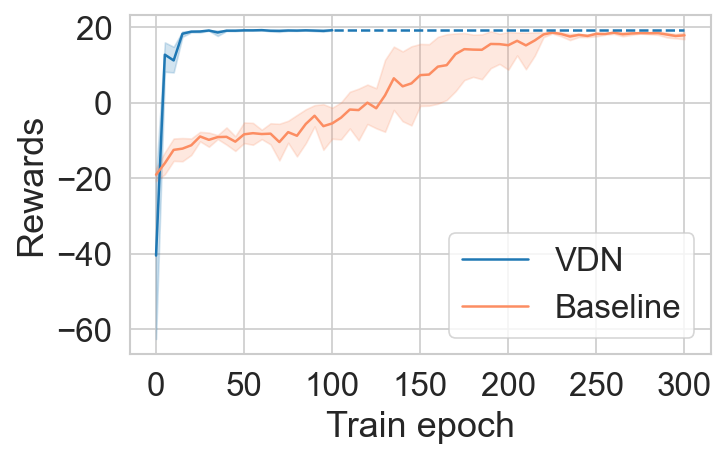

In [100]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Rewards',hue='schema',data=data_2d)
ax1 = plt.plot(x_app,y_app['reward'],linestyle = '--',color=(0.12156862745098039, 0.47058823529411764, 0.7058823529411765))
ax = plt.gca()
ax.set_xticks(range(0,301,50))
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

In [105]:
vdn3d = load_vdn_data('vdn-3d',maxepoch=100,space=5)
ppo3d = load_ppo_data('ppo-3d',maxepoch=300,spacing=5)

In [106]:
data_3d = pd.concat([vdn3d,ppo3d],axis=0,ignore_index=True)
last  = vdn3d[vdn3d['Train epoch']==100]
x_app,y_app = append_data(100,300,last)

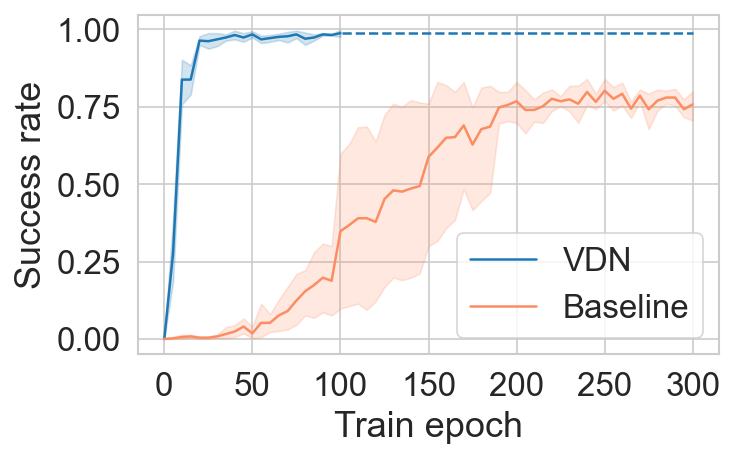

In [107]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Success rate',hue='schema',data=data_3d)
ax1 = plt.plot(x_app,y_app['success'],linestyle = '--',color=(0.12156862745098039, 0.47058823529411764, 0.7058823529411765))
ax = plt.gca()
ax.set_xticks(range(0,301,50))
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

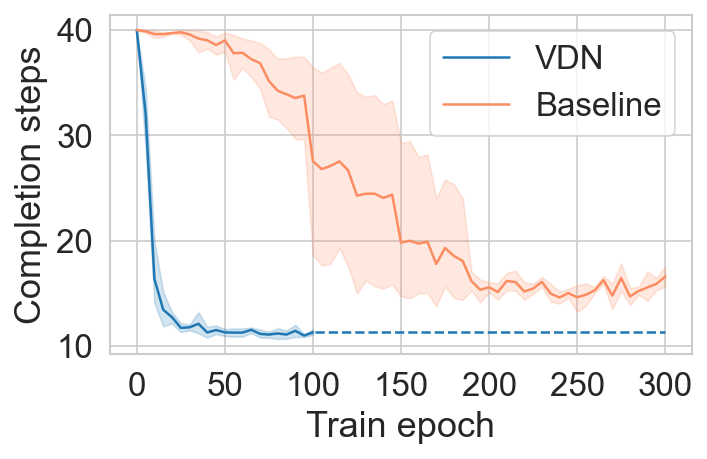

In [108]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Completion steps',hue='schema',data=data_3d)
ax1 = plt.plot(x_app,y_app['step'],linestyle = '--',color=(0.12156862745098039, 0.47058823529411764, 0.7058823529411765))
ax = plt.gca()
ax.set_xticks(range(0,301,50))
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

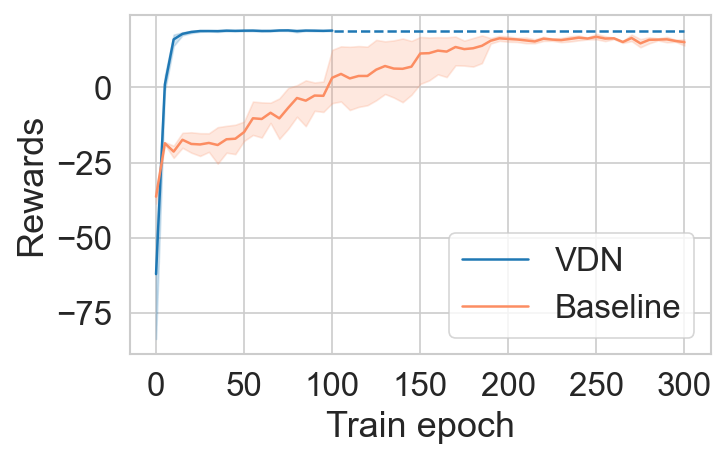

In [109]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Rewards',hue='schema',data=data_3d)
ax1 = plt.plot(x_app,y_app['reward'],linestyle = '--',color=(0.12156862745098039, 0.47058823529411764, 0.7058823529411765))
ax = plt.gca()
ax.set_xticks(range(0,301,50))
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

In [17]:
vdn4d = load_vdn_data('vdn-4d',maxepoch=100,space=5)
ppo4d = load_ppo_data('ppo-4d',maxepoch=450,spacing=5)

In [18]:
data_4d = pd.concat([vdn4d,ppo4d],axis=0,ignore_index=True)
last  = vdn4d[vdn4d['Train epoch']==100]
x_app,y_app = append_data(100,450,last)

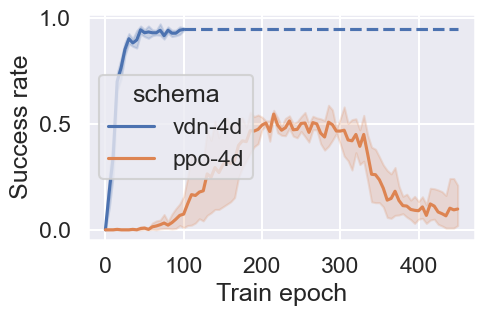

In [19]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=100)
ax1 =sns.lineplot(x='Train epoch',y='Success rate',hue='schema',data=data_4d)
ax1 = plt.plot(x_app,y_app['success'],linestyle = '--',color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725))

In [20]:
max(data_4d['Success rate'])

0.99